In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# Import data

In [2]:
dataframe = pd.read_csv('../input/creditcardfraud/creditcard.csv', header=0)
amount = dataframe.Amount
dataframe = dataframe.drop(columns=["Time", "Amount"])
raw_data = dataframe.values
dataframe.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28  Class  
0  0.066928  0.128539 -0.189115  0.133558 -0.021053      0  
1 -0.339846  0.167170  0.125895 -0.008983  0.014724      0  
2 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752      0  
3 -1.175575  0.647376 -0.221929  0.062723  0.061458      0  
4  0.141267 -0.206010  0.502292  0.219422  0.215153      0  

[5 rows x 29 columns]

In [3]:
pd.value_counts(dataframe['Class'], sort = True) #class comparison 0=Normal 1=Fraud

0    284315
1       492
Name: Class, dtype: int64

# Split and Normalize [0-1]

In [4]:
labels = raw_data[:, -1]
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels, train_amount, test_amount = train_test_split(data, labels, amount, test_size=0.2, random_state=21, stratify=dataframe['Class'])

# min-max train e test data
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

# min-max train e test amount
min_val_amount = tf.reduce_min(train_amount)
max_val_amount = tf.reduce_max(train_amount)

train_amount = (train_amount - min_val_amount) / (max_val_amount - min_val_amount)
test_amount = (test_amount - min_val_amount) / (max_val_amount - min_val_amount)

train_amount = tf.cast(train_amount, tf.float32)
test_amount = tf.cast(test_amount, tf.float32)

# Split data in normal and fraud data

In [5]:
normal_train_data = train_data[train_labels == 0]
normal_test_data = test_data[test_labels == 0]

anomalous_train_data = train_data[train_labels == 1]
anomalous_test_data = test_data[test_labels == 1]

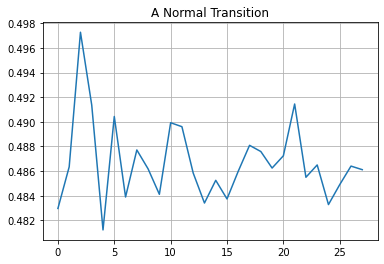

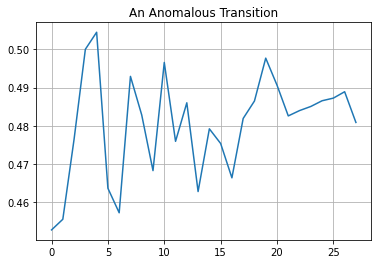

In [6]:
plt.grid()
plt.plot(np.arange(28), normal_train_data[0])
plt.title("A Normal Transition")
plt.show()

plt.grid()
plt.plot(np.arange(28), anomalous_train_data[0])
plt.title("An Anomalous Transition")
plt.show()

# Training Autoencoder

Epoch 1/100
889/889 [==============================] - 5s 5ms/step - loss: 2.9476e-05 - val_loss: 1.8374e-05
Epoch 2/100
889/889 [==============================] - 4s 4ms/step - loss: 1.7984e-05 - val_loss: 1.6090e-05
Epoch 3/100
889/889 [==============================] - 4s 4ms/step - loss: 1.7535e-05 - val_loss: 1.3615e-05
Epoch 4/100
889/889 [==============================] - 4s 4ms/step - loss: 1.3808e-05 - val_loss: 1.2083e-05
Epoch 5/100
889/889 [==============================] - 4s 5ms/step - loss: 1.1707e-05 - val_loss: 1.0785e-05
Epoch 6/100
889/889 [==============================] - 4s 4ms/step - loss: 1.0740e-05 - val_loss: 9.1750e-06
Epoch 7/100
889/889 [==============================] - 4s 4ms/step - loss: 9.4615e-06 - val_loss: 8.7919e-06
Epoch 8/100
889/889 [==============================] - 4s 4ms/step - loss: 8.5137e-06 - val_loss: 7.0710e-06
Epoch 9/100
889/889 [==============================] - 4s 4ms/step - loss: 7.6322e-06 - val_loss: 7.3647e-06
Epoch 10/100
889/88

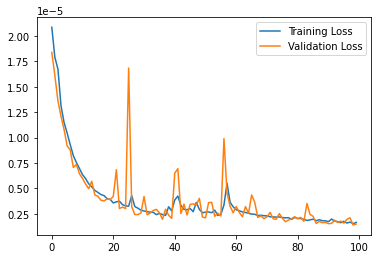

In [7]:
tf.random.set_seed(0)

inp = keras.layers.Input(shape=[28,])
x = keras.layers.Dense(128, activation="relu") (inp)
x = keras.layers.Dense(64, activation="relu") (x)
x = keras.layers.Dense(32, activation="relu") (x)
x = keras.layers.Dense(64, activation="relu") (x)
x = keras.layers.Dense(128, activation="relu") (x)
out = keras.layers.Dense(28, activation="sigmoid") (x)

autoencoder = keras.models.Model(inp, out)

autoencoder.compile(optimizer='adam', loss='mse')

history = autoencoder.fit(normal_train_data, normal_train_data, 
                          epochs=100, 
                          batch_size=256,
                          callbacks=[keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.h5", monitor="val_loss", save_best_only=True, verbose=0)],
                          validation_data=(normal_test_data, normal_test_data), #test_data, test_data
                          shuffle=True)

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [8]:
autoencoder = keras.models.load_model("./autoencoder_fraud.h5")
autoencoder.evaluate(normal_test_data, normal_test_data) #test_data, test_data

1777/1777 [==============================] - 2s 905us/step - loss: 1.4118e-06


1.4117759974396904e-06

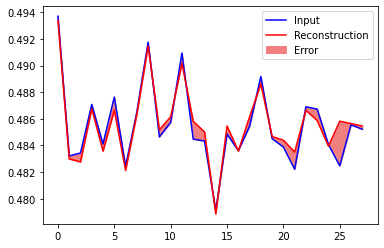

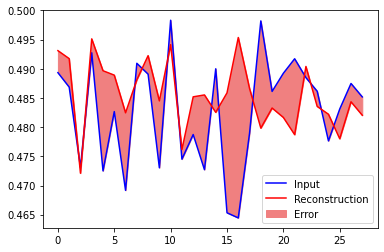

In [9]:
decoded_data = autoencoder(normal_test_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(28), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

decoded_data = autoencoder(anomalous_test_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(28), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

# Baseline with std threshold

Threshold:  0.0012413984


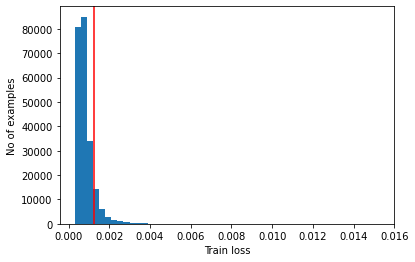

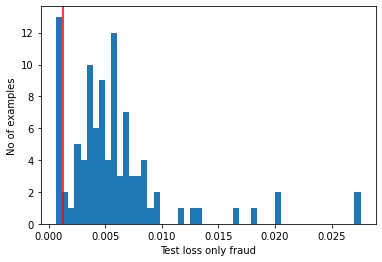

In [10]:
train_loss = tf.keras.losses.mae(autoencoder(normal_train_data), normal_train_data)

threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

plt.hist(train_loss[None,:], bins=50)
plt.axvline(x=threshold, c="red")
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

test_loss = tf.keras.losses.mae(autoencoder(anomalous_test_data), anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.axvline(x=threshold, c="red")
plt.xlabel("Test loss only fraud")
plt.ylabel("No of examples")
plt.show()

In [11]:
def predict(model, data, threshold):
    reconstructions = model(data)
    loss = tf.keras.losses.mae(reconstructions, data)
    return tf.math.logical_not(tf.math.less(loss, threshold))

def print_stats(predictions, labels):
    print("Accuracy = {}".format(accuracy_score(labels, predictions)))
    print("Precision = {}".format(precision_score(labels, predictions)))
    print("Recall = {}".format(recall_score(labels, predictions)))

print(np.unique(test_labels, return_counts=True)[1])
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)
confusion_matrix(preds, test_labels)

[56864    98]
Accuracy = 0.8907868403497068
Precision = 0.013507071349118068
Recall = 0.8673469387755102


array([[50656,    13],
       [ 6208,    85]])

* Based on confuzion matrix the mlp classifier hit 85/98 frad in test set.
* 13 fraud is confused with not fraud
* 6208 not fraud is confused with fraud

# Freeze Autoencoder weight + MLP

In [12]:
weight_for_0 = (1 / len(train_labels[train_labels == 0])) * (len(train_labels) / 2.0)
weight_for_1 = (1 / len(train_labels[train_labels == 1])) * (len(train_labels) / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}
class_weight

{0: 0.5008661206149897, 1: 289.1434010152284}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28)]              0         
_________________________________________________________________
model (Functional)           (None, 28)                28092     
_________________________________________________________________
batch_normalization (BatchNo (None, 28)                112       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                1856      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 30,125
Trainable params: 1,977
Non-trainable params: 28,148
_________________________________________________________________
Epoch 1/25
1781/1781 [==============================] - 7s 4ms/step - loss: 0.3001 - auc: 0.9339 - prc: 0.5475 - val_

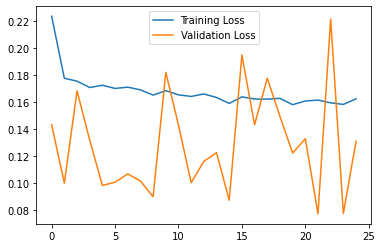

In [13]:
tf.random.set_seed(0)

inp = keras.layers.Input(shape=[28,])
x = autoencoder (inp)
x = keras.layers.BatchNormalization() (x)
x = keras.layers.Dense(64, activation="elu") (x)
#x = keras.layers.Dropout(0.15) (x)
out = keras.layers.Dense(1, activation="sigmoid") (x)

mlp = keras.models.Model([inp], out)
mlp.layers[1].trainable = False # blocco i pesi dell'autoencoder

mlp.summary()
mlp.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', 
            metrics=[keras.metrics.AUC(name='auc'),
                     keras.metrics.AUC(name='prc', curve='PR')])

history = mlp.fit([train_data], 
                  train_labels,
                  epochs=25, 
                  batch_size=128,
                  callbacks=[keras.callbacks.ModelCheckpoint(filepath="mlp_fraud.h5", monitor="val_prc", save_best_only=True, verbose=0)],
                  validation_data=([test_data], test_labels),
                  class_weight=class_weight,
                  shuffle=True)

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [14]:
print(np.unique(test_labels, return_counts=True)[1])

mlp = keras.models.load_model("./mlp_fraud.h5")
print_stats(np.rint(mlp(test_data).numpy()), test_labels)
confusion_matrix(np.rint(mlp(test_data).numpy()), test_labels) 

[56864    98]
Accuracy = 0.9468593097152488
Precision = 0.0301572024382419
Recall = 0.9591836734693877


array([[53841,     4],
       [ 3023,    94]])

* Based on confuzion matrix the mlp classifier hit 94/98 frad in test set.
* 4 fraud is confused with not fraud
* 3023 not fraud is confused with fraud